In [1]:
from misc import test_time_mem
from misc import generate_random_transport_problem
from misc import round_to
from misc import timeout
import copy
from tp_potential import Data

from simplex import simplex_method
from northwest import northwest_corner_method
from least import least_cost_cell_method
from vogel import vogels_approximation_method
from tp_potential import solve as potential_method

size = 5
min_cost = 1
max_cost = 10
min_supply = 10
max_supply = 40
min_demand = 5
max_demand = 30

In [2]:
ROUND_N = 3

@timeout(1)
def run_tests(func, size, n_loops, potential=False):
    
    cost_matrix, supply, demand = generate_random_transport_problem(size, size, min_cost, max_cost, min_supply, max_supply, min_demand, max_demand)

    global_res = dict(cost = 0, time = 0, memory = 0)
    for _ in range(n_loops):
        res = None
        if not potential:
            res = test_time_mem(func, cost_matrix, supply, demand)
        else:
            data = Data(
                supply.copy(),
                demand.copy(),
                copy.deepcopy(cost_matrix),
            )
            res = test_time_mem(func, cost_matrix, potential=True, data=data)
        global_res["cost"] += res["cost"]
        global_res["time"] += res["time"]
        global_res["memory"] += res["memory"]
    
    global_res["cost"] /= n_loops
    global_res["time"] /= n_loops
    global_res["memory"] /= n_loops
    
    global_res["cost"] = round_to(global_res["cost"], ROUND_N)
    global_res["time"] = round_to(global_res["time"], ROUND_N)
    global_res["memory"] = round_to(global_res["memory"], ROUND_N)
    
    return global_res

In [3]:
methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
colors = ["#000", "#0FF20F", "#F2AA0F", "#0F5EF2", "#F20F80", "#5B729E"]

In [4]:
# print(x)

In [5]:
# for method in methods:
#     print([x["cost"] for x in results[method]])
#     print([x["time"] for x in results[method]])
#     print([x["memory"] for x in results[method]])
#     print()


In [6]:
import matplotlib.pyplot as plt

def plot_all(x, results, xlabel = "Размер матрицы n x n"):

    # Create a figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

    for method, color in zip(methods, colors):
      # Plot on the first subplot
      ax1.plot(x, [x["cost"] for x in results[method]], color=color, label=method, marker=".", linestyle="dotted")
          
      # Plot on the second subplot
      ax2.plot(x, [x["time"] for x in results[method]], color=color, label=method, marker=".", linestyle="dotted")

      # Plot on the second subplot
      ax3.plot(x, [x["memory"] for x in results[method]], color=color, label=method, marker=".", linestyle="dotted")
        
    ax1.set_title('Решения')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Ответ')
    ax1.legend()

    ax2.set_title('Время')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Время, сек.')
    ax2.legend()

    ax3.set_title('Память')
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel('Память, кб')
    ax3.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

c:\Users\Nick\Documents\Programming\Python\transport-problem\simplex.py:34: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method='simplex')


[3, 4, 5, 6, 7, 8, 9, 10]


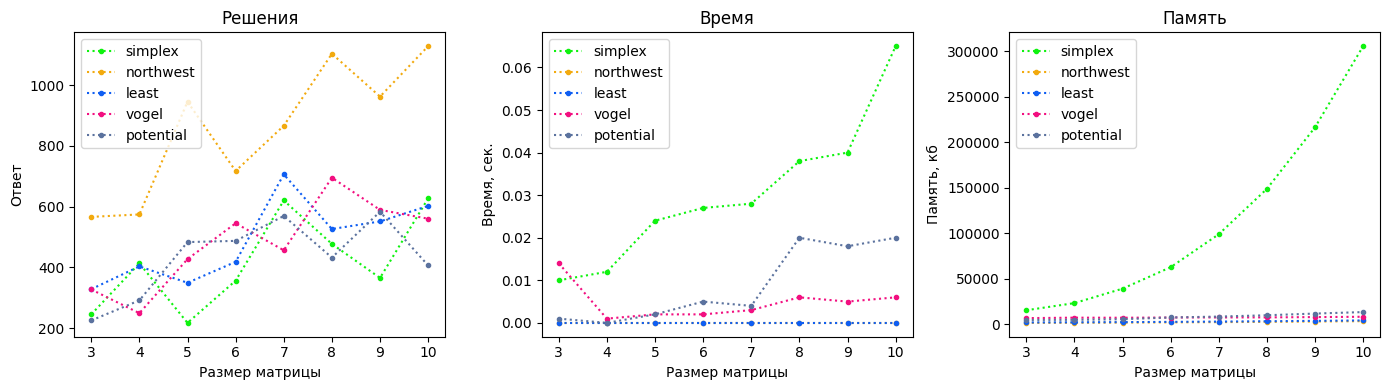

In [7]:
SIZE_START = 3
SIZE_END = 10
LOOPS = 3

results = dict(
    simplex = [],
    northwest = [],
    least = [],
    vogel = [],
    potential = []
    )

x = []

for size in range(SIZE_START, SIZE_END + 1):
    
    try:
        results["potential"].append(run_tests(potential_method, size, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, size, LOOPS))
    except:
        continue
    x.append(size)
    results["simplex"].append(run_tests(simplex_method, size, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, size, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, size, LOOPS))
    
    # print(results["simplex"][-1])
    
print(x)

plot_all(x, results)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


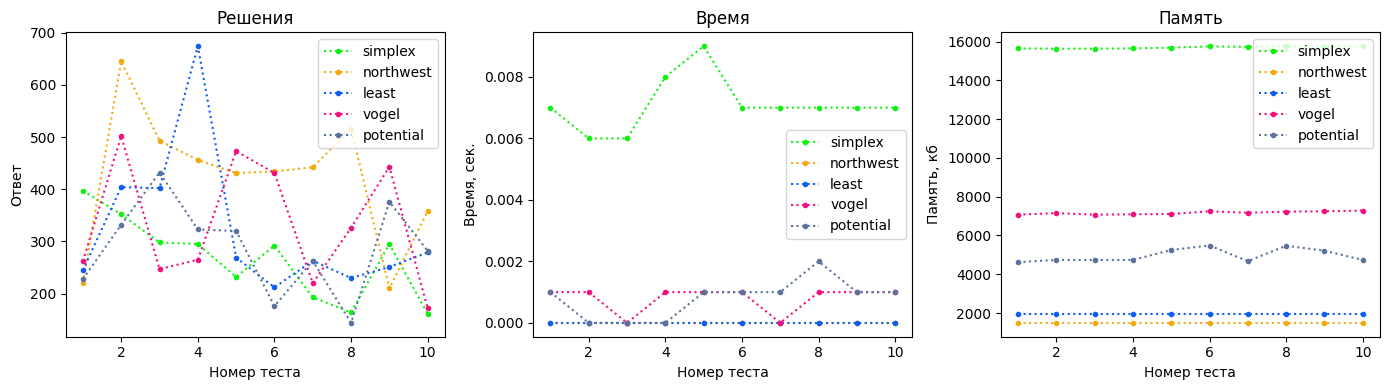

In [8]:
SIZE = 3
TESTS = 10
LOOPS = 3

results = dict(
    simplex = [],
    northwest = [],
    least = [],
    vogel = [],
    potential = []
    )

x = []

for size in range(1, TESTS + 1):
    
    try:
        results["potential"].append(run_tests(potential_method, SIZE, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, SIZE, LOOPS))
    except:
        continue
    x.append(size)
    results["simplex"].append(run_tests(simplex_method, SIZE, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, SIZE, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, SIZE, LOOPS))
    
    # print(results["simplex"][-1])
    
print(x)

plot_all(x, results, "Номер теста")

c:\Users\Nick\Documents\Programming\Python\transport-problem\simplex.py:34: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method='simplex')


[1, 2, 3, 4, 5]


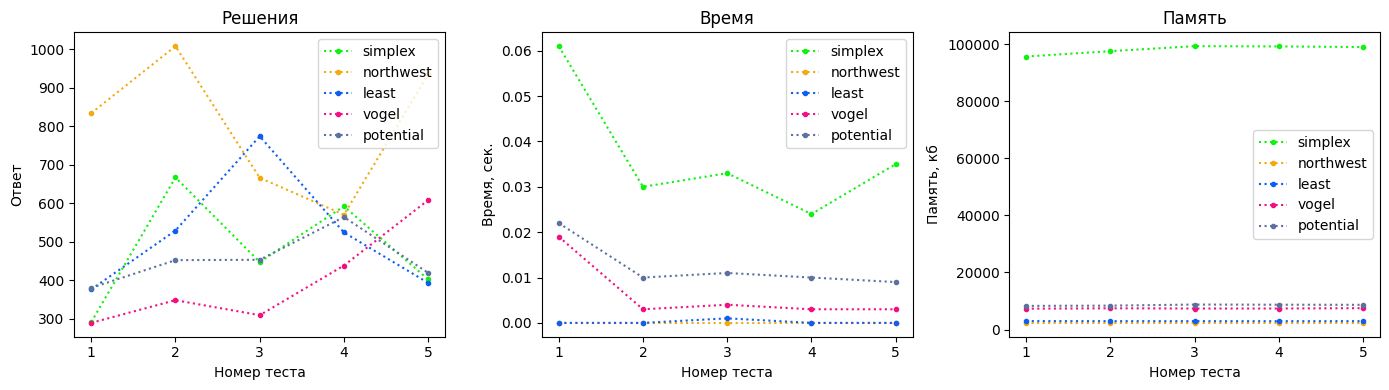

In [7]:
SIZE = 7
TESTS = 5
LOOPS = 3

results = dict(
    simplex = [],
    northwest = [],
    least = [],
    vogel = [],
    potential = []
    )

x = []

for size in range(1, TESTS + 1):
    
    try:
        results["potential"].append(run_tests(potential_method, SIZE, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, SIZE, LOOPS))
    except:
        continue
    x.append(size)
    results["simplex"].append(run_tests(simplex_method, SIZE, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, SIZE, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, SIZE, LOOPS))
    
    # print(results["simplex"][-1])
    
print(x)

plot_all(x, results, "Номер теста")

c:\Users\Nick\Documents\Programming\Python\transport-problem\simplex.py:34: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


[3, 4, 5, 6, 7, 8]


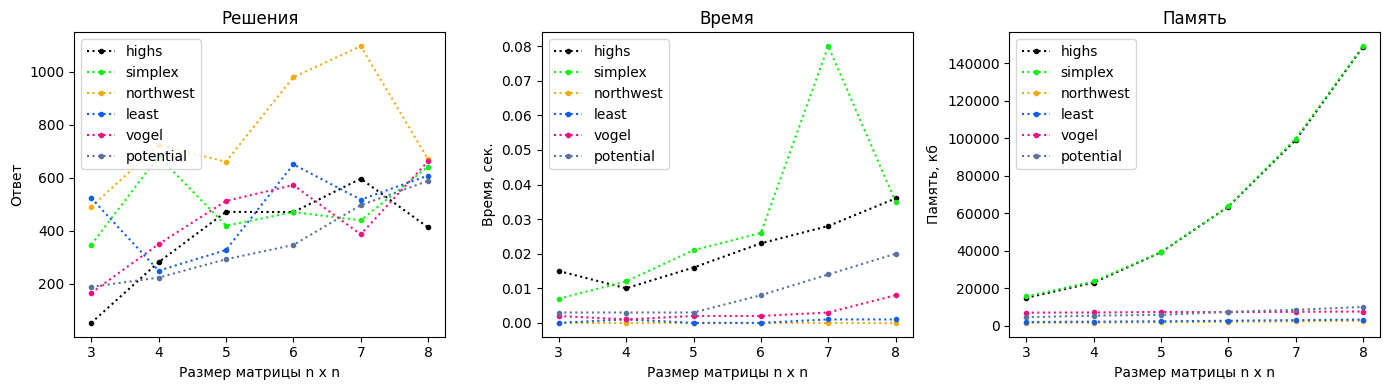

In [9]:
SIZE_START = 3
SIZE_END = 10
LOOPS = 1

results = dict(
    highs = [],
    simplex = [],
    northwest = [],
    least = [],
    vogel = [],
    potential = []
    )

x = []

for size in range(SIZE_START, SIZE_END + 1):
    
    try:
        results["potential"].append(run_tests(potential_method, size, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, size, LOOPS))
    except:
        continue
    x.append(size)
    results["highs"].append(run_tests(simplex_method, size, LOOPS))
    results["simplex"].append(run_tests(simplex_method, size, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, size, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, size, LOOPS))
    
    # print(results["simplex"][-1])
    
print(x)

plot_all(x, results)